In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Conv2D,DepthwiseConv2D,Conv1D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

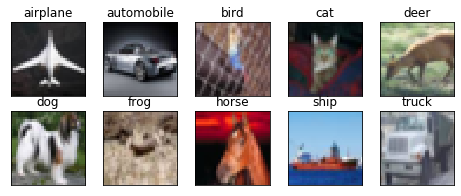

In [22]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [26]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [27]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 15, 15, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 25s 65ms/step - loss: 1.8565 - acc: 0.2910 - val_loss: 1.4264 - val_acc: 0.4716
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3463 - acc: 0.5145 - val_loss: 1.1478 - val_acc: 0.5848
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 1.1439 - acc: 0.5946 - val_loss: 0.9625 - val_acc: 0.6635
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 1.0059 - acc: 0.6468 - val_loss: 0.9015 - val_acc: 0.6886
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9081 - acc: 0.6854 - val_loss: 0.7988 - val_acc: 0.7207
Epoch 6/50
390/390 [==============================] - 21s 54ms/step - loss: 0.8376 - acc: 0.7102 - val_loss: 0.7565 - val_acc: 0.7412
Epoch 7/50
390/390 [==============================] - 21s 53ms/step - loss: 0.7796 - acc: 0.7322 - val_loss: 0.7603 - val_acc: 0.7372
Epoch 8/50
390/390 [==============================] - 21s 53ms

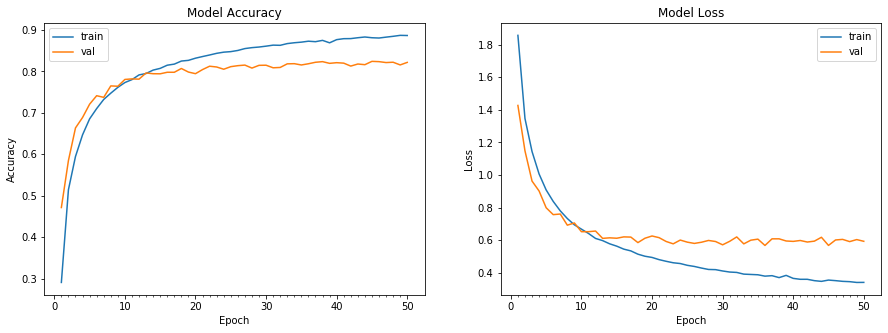

Accuracy on test data is: 82.15


In [28]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model=Sequential()

model.add(DepthwiseConv2D(3,activation='relu', padding="same",input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(3,activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(32, 1,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D(3,activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(3,activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(64, 1,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D(3,activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(3,strides=(2,2),activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(128, 1,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D(3,activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(3,strides=(2,2),activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(256, 1,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation="softmax"))




In [67]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_191 (Depthw (None, 32, 32, 3)         30        
_________________________________________________________________
batch_normalization_286 (Bat (None, 32, 32, 3)         12        
_________________________________________________________________
dropout_296 (Dropout)        (None, 32, 32, 3)         0         
_________________________________________________________________
depthwise_conv2d_192 (Depthw (None, 32, 32, 3)         30        
_________________________________________________________________
batch_normalization_287 (Bat (None, 32, 32, 3)         12        
_________________________________________________________________
dropout_297 (Dropout)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 32, 32, 16)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 57s 146ms/step - loss: 0.8335 - acc: 0.7095 - val_loss: 1.0454 - val_acc: 0.6534
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 43s 109ms/step - loss: 0.7847 - acc: 0.7287 - val_loss: 0.8991 - val_acc: 0.6909
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 43s 109ms/step - loss: 0.7452 - acc: 0.7407 - val_loss: 0.7341 - val_acc: 0.7477
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 43s 109ms/step - loss: 0.7198 - acc: 0.7494 - val_loss: 0.8326 - val_acc: 0.7204
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 43s 109ms/step - loss: 0.7003 - acc: 0

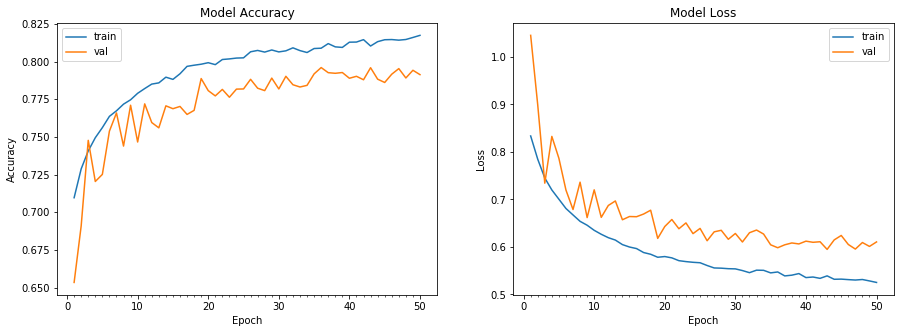

Accuracy on test data is: 79.13


In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels ), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))